In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=15,6
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("AirPassengers.csv")

In [3]:
data["Month"].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data["Month"]=data["Month"].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data=data.set_index("Month")
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [6]:
ts=data["#Passengers"]

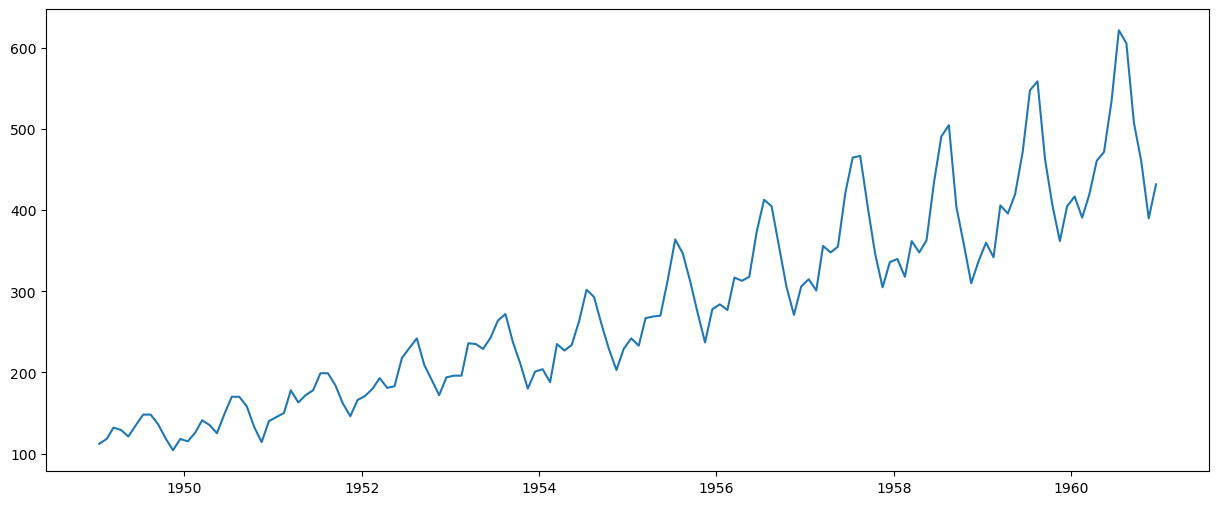

In [7]:
plt.plot(ts)

In [8]:
ts_log=np.log(ts)

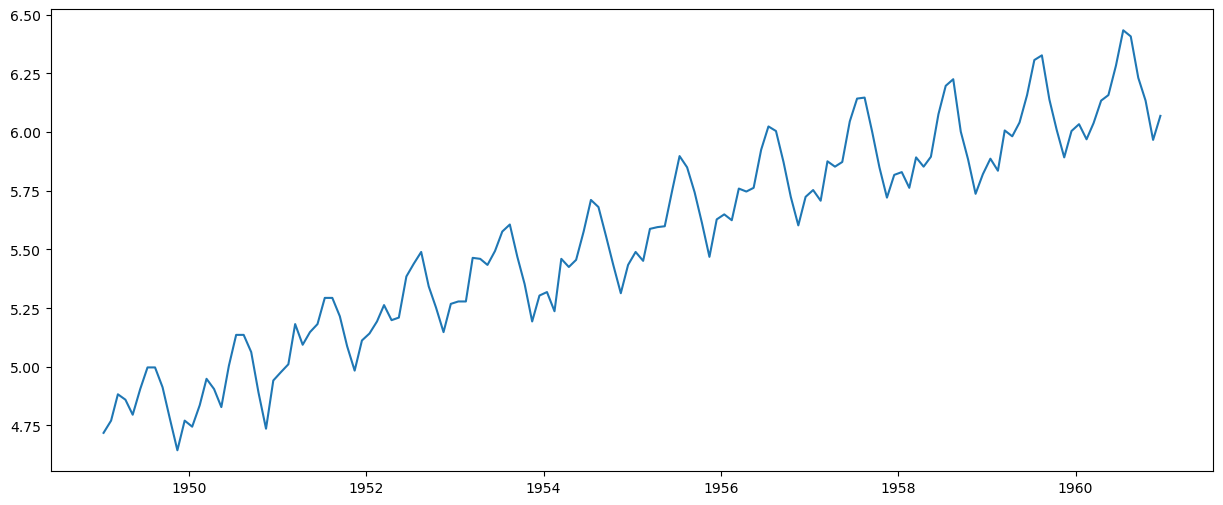

In [9]:
plt.plot(ts_log)

In [10]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    orig=plt.plot(timeseries,color="blue",label="Original")
    orig=plt.plot(rolmean,color="red",label="Rolling Mean")
    orig=plt.plot(rolstd,color="black",label="Rolling Standard Deviation")
    plt.legend(loc="best")
    plt.show(block=False)
    
    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(timeseries,autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4],index = ["Test Statistic", "p-value","#lag used","Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
        print(dfoutput)
                 


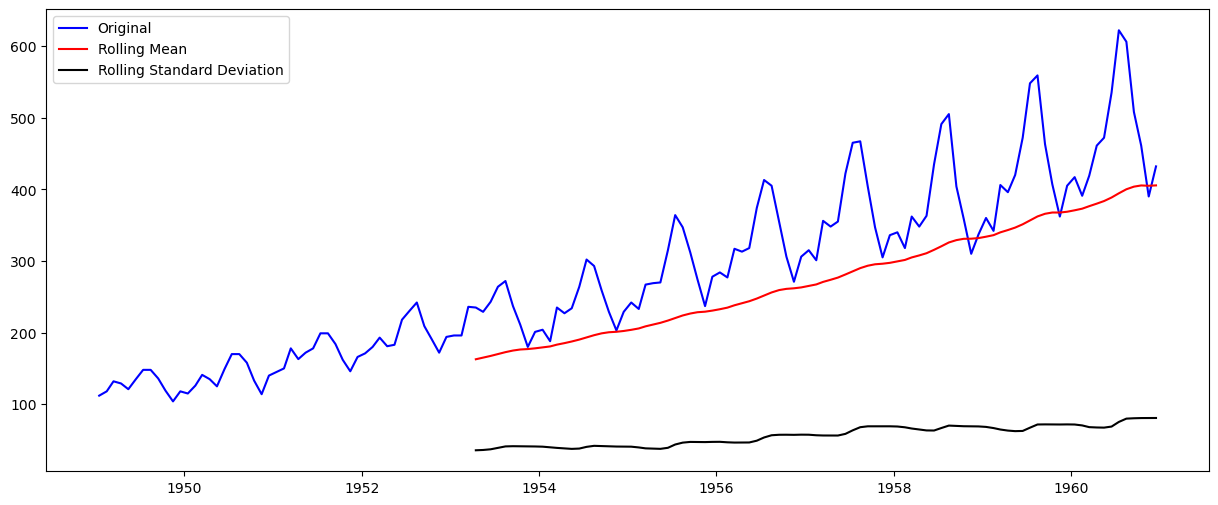

Result of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#lag used                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#lag used                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#lag used                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
test_stationarity(data["#Passengers"])

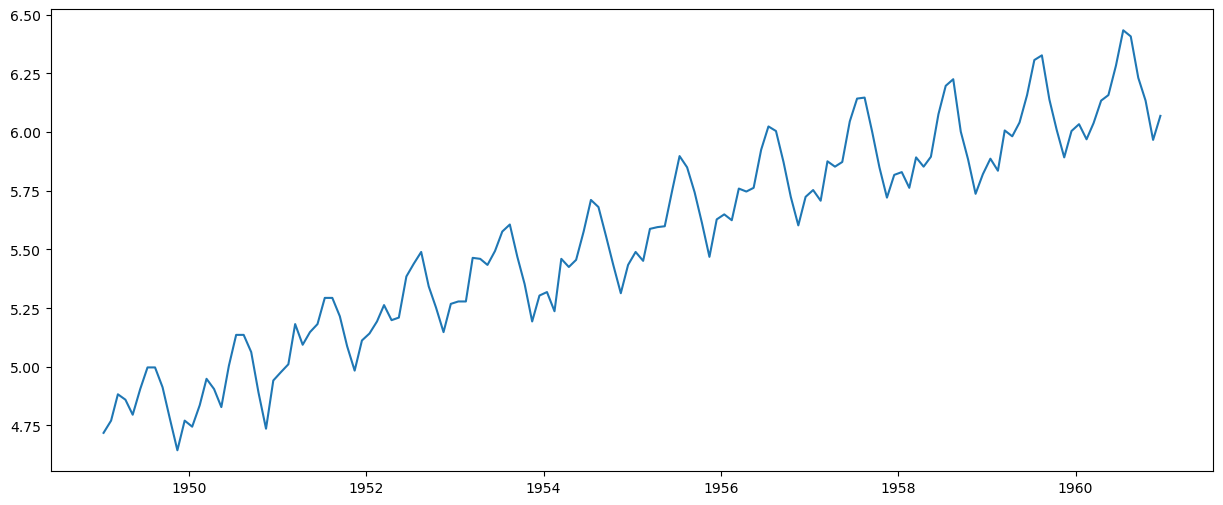

In [12]:
plt.plot(ts_log)

In [13]:
# initializing the data to moving avg,and then plotting

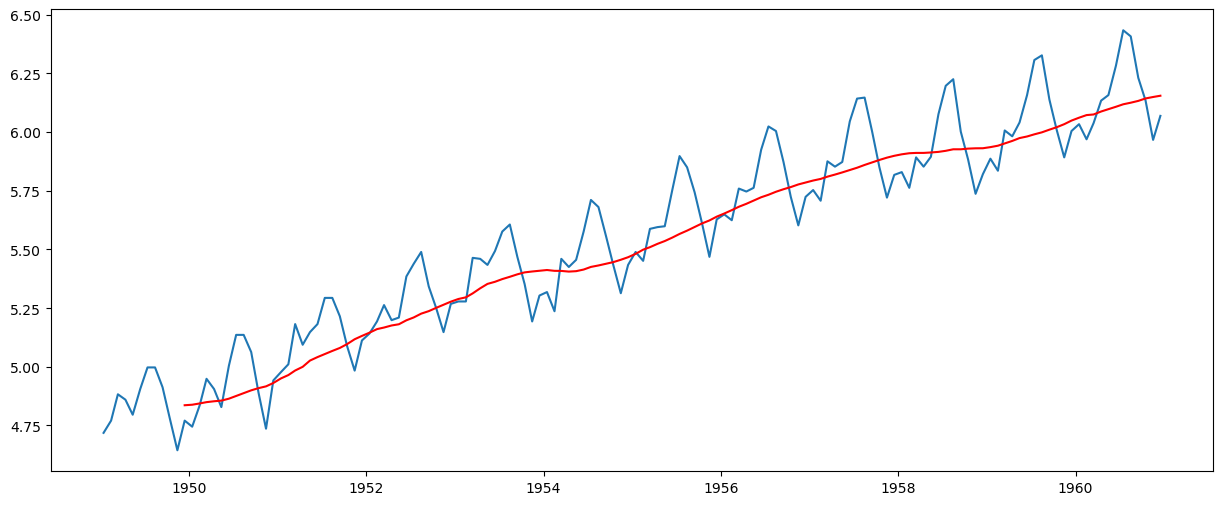

In [14]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color="Red")

In [15]:
ts_log_mv_diff=ts_log=movingAverage
ts_log_mv_diff.head(12)
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15    4.836178
1950-01-15    4.838381
1950-02-15    4.843848
1950-03-15    4.849344
1950-04-15    4.853133
1950-05-15    4.855843
1950-06-15    4.864066
1950-07-15    4.875614
1950-08-15    4.887163
1950-09-15    4.899658
Name: #Passengers, dtype: float64

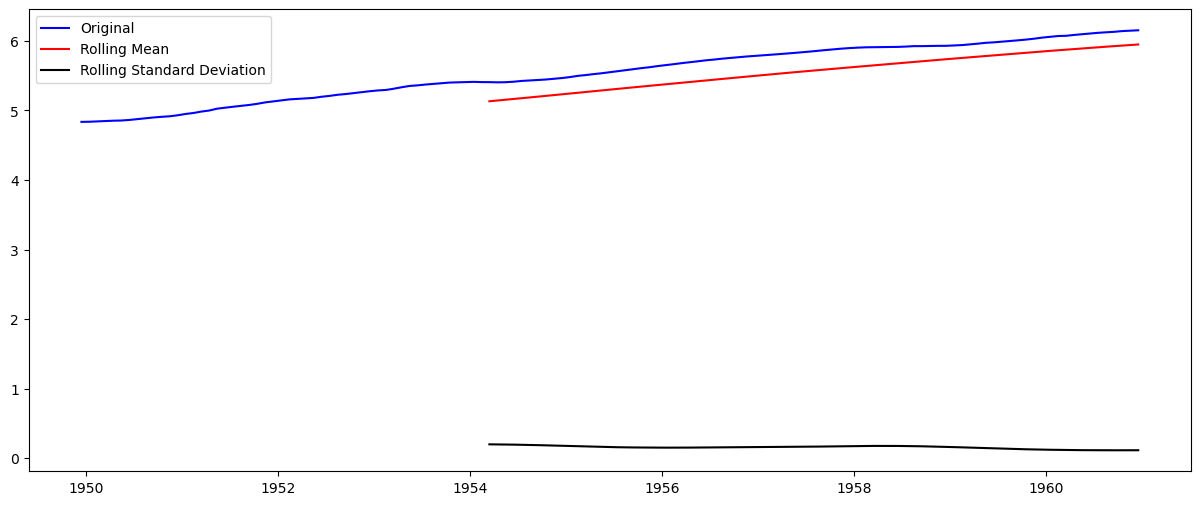

Result of Dickey-Fuller Test:
Test Statistic                  -1.737158
p-value                          0.412076
#lag used                       13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
dtype: float64
Test Statistic                  -1.737158
p-value                          0.412076
#lag used                       13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64
Test Statistic                  -1.737158
p-value                          0.412076
#lag used                       13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [16]:
test_stationarity(ts_log_mv_diff)